In [4]:
# Preamble  here 
import util
reload(util)
import numpy as np 
import sklearn
from sklearn import datasets
from scipy.sparse.linalg import eigsh
% matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 5)

# Demo for graph cut algorithms

This script serves as a demo for various graph-cut based segmentation algorithms implemented in python. 

We will use the `Two Moons` dataset shown below for most of the demonstration. 

In [2]:
# Two Moons dataset with different noise levels
n_samples = 800
x = np.zeros([n_samples,2,3])
y = np.zeros([n_samples,3])
plt.figure(1)
for i in range(3):
    x[:,:,i],y[:,i] = sklearn.datasets.make_moons(n_samples=n_samples, noise=0.02+.03*(i+1),shuffle = False)
    n_mid = int(n_samples/2)
    color = 'r'*n_mid + 'b'*n_mid
    plt.subplot(1,3,i+1)
    plt.scatter(x[:,0,i],x[:,1,i],s = 3, color = color)
    plt.title('Rawdata, sigma = {sig}'.format(sig = 0.02+.03*(i+1)))
plt.tight_layout()    
plt.show()


NameError: name 'np' is not defined

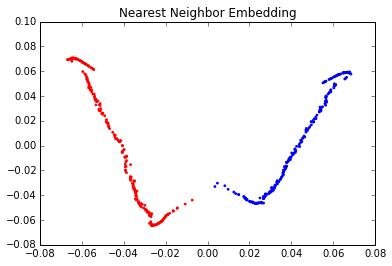

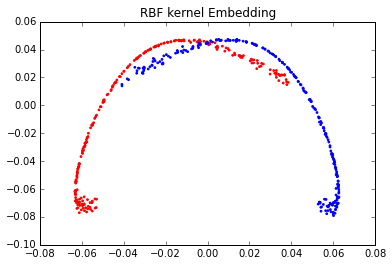

In [46]:

#nearest neighbor graph
lap = util.build_laplacian_matrix(raw_data = x,affinity = 'nearest_neighbors', n_neighbors = 50)
E,V = eigsh(lap,3,which = 'SM')
x_t = V[:,1]
y_t = V[:,2]
color = 'r'*n_mid + 'b'*n_mid
plt.scatter(x_t,y_t,s = 3, color = color)
plt.title('Nearest Neighbor Embedding')
plt.show()

#rbf kernel
lap = util.build_laplacian_matrix(raw_data = x,affinity = 'rbf')
E,V = eigsh(lap,3,which = 'SM')
x_t = V[:,1]
y_t = V[:,2]
color = 'r'*n_mid + 'b'*n_mid
plt.scatter(x_t,y_t,s = 3, color = color)
plt.title('RBF kernel Embedding')
plt.show()





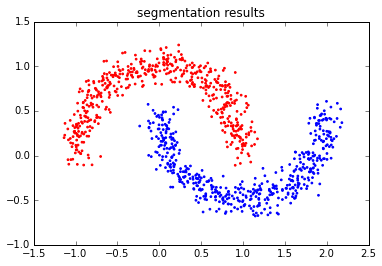

In [35]:
# Testing supervised learning
import graph_cluster as gc
from numpy.random import permutation
reload (gc)
n_samples = x.shape[0]
ind = permutation(n_samples)
u_init = np.zeros(n_samples)
mid = n_samples/2
reg_params = {'eps':1, 'eta':2}
u_init[ind[:mid]] = 1
u_init[ind[mid:]] = -1
ground_truth = np.concatenate((np.ones(mid),-np.ones(mid)),axis = 0)
gl_clf = gc.LaplacianClustering(scheme_type = 'GL_fidelity',  reg_params = reg_params
                                ,raw_data = x, u_init = u_init, 
                                affinity = 'nearest_neighbors', n_neighbors = 50,
                                Neig = 50, ground_truth = ground_truth)

gl_clf.generate_random_fidelity(percent = .1)
gl_clf.fit_predict()
u = gl_clf.labels_
#classification results
color = ""
for l in u:
    if l>0:
        color += 'r'
    else:
        color += 'b'

plt.scatter(x[:,0],x[:,1],s = 3, color = color)
plt.title('segmentation results')
plt.show()



In [24]:
fid = gl_clf.fid
fid[:,1].ravel().shape

(200,)

In [31]:
def generate_random_fidelity(ind, perc):
    """  generate perc percent random fidelity out of index set ind

    Parameters
    -----------
    ind : ndarray, (n_sample_in_class, )
    perc : float, percent to sample

    """
    num_sample = int(np.ceil(len(ind)*perc))
    ind2 = np.random.permutation(len(ind))
    return ind[ind2[:num_sample]]

In [54]:
a = np.array([])

In [55]:
a

array([], dtype=float64)

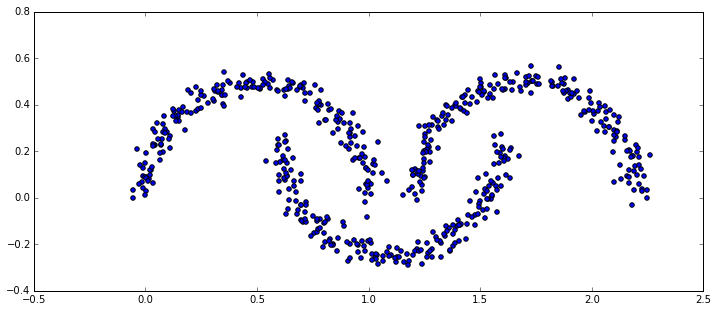

In [56]:
import data
reload(data)
X,Y = data.three_moons()
plt.scatter(X[:,0],X[:,1])

In [54]:
X,Y = data.three_moons()

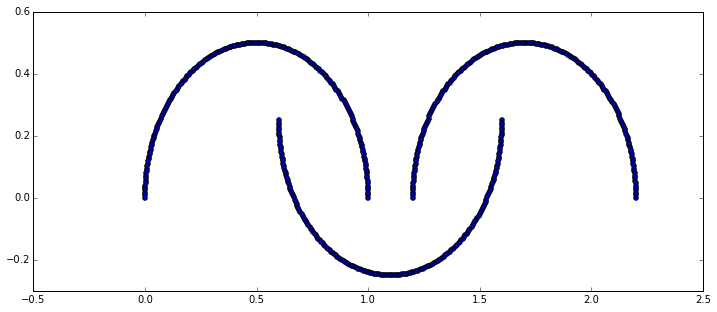

In [55]:
plt.scatter(X[:,0],X[:,1])

In [1]:
from scipy.spatial.distance import cdist

In [8]:
import numpy as np
x = np.array([[1,2],[1,3],[1,5]])
x = np.concatenate((x,x),axis = 0)

In [11]:
a = x.reshape(2,2,3)

In [21]:
c = a[:,1,1]

In [25]:
b = a[:,:,1]

In [37]:
c = np.arange(10)

In [57]:
np.real(1+3j)

array(1.0)

In [54]:
np.pad()

(array([ 2.82399989,  3.9880225 ]), array([[-0.68460925, -0.72891026],
        [-0.72891026,  0.68460925]]))